<a href="https://colab.research.google.com/github/hwankang/Defense/blob/main/NXP_ML_Prediction_Master_Prac_P2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

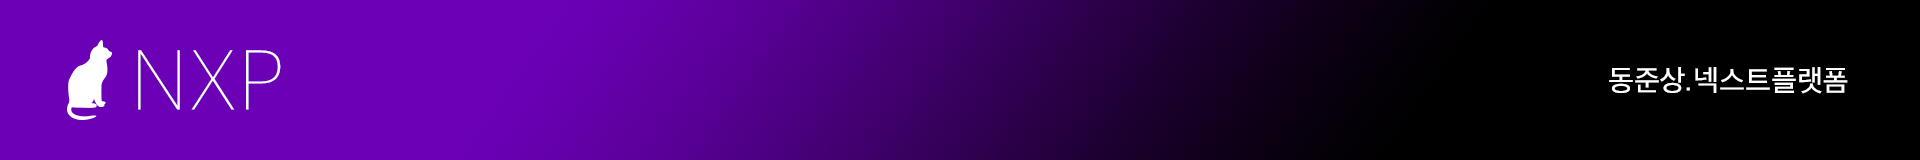

### 이번 예제는 머신러닝의 주요 프로세스를 상세하게 설명합니다.

* 미션1: 아래 모든 코드셀 위에 텍스트셀을 생성하고 헤드라인 속성을 적용하여 코드의 제목을 입력하세요.

* 미션2: 코드셀에서 주석문 처리된 공란에 적절한 코드를 입력하세요.

* 미션3: 완성된 코드를 ipynb 파일로 다운로드한 뒤, 강연자에게 메일로 전송하세요. (강연자: 동준상 naebon1@gmail.com)

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 28 15:46:31 2019

@author: berkunis
"""

In [ ]:
##############################################01_02_PythonLibraries#####################################################


In [ ]:
#데이터 임포트1. 런타임


In [ ]:
#데이터 임포트2. 구글 드라이브


In [ ]:
############################################01_03_HandlingMissingValues###################################################


In [ ]:
#option0 for dropping the entire column


In [ ]:
#option1 for dropping NAN


In [ ]:
#option2 for filling NaN # reloading fresh dataset for option 2


In [ ]:
#option3 for filling NaN # reloading fresh dataset for option 3


In [ ]:
############################################01_04_ConvertCategoricalDataintoNumbers##############################################


In [ ]:
#option1: pandas get_dummies: maps each category to 0 (cold) or 1 (hot) = one hot encoder 


In [ ]:
#option2: sklearn label encoding: maps each category to a different integer


In [ ]:
#option3: sklearn one hot encoding: maps each category to 0 (cold) or 1 (hot) 


In [ ]:
############################################01_05_DividingtheDataintoTestandTrain##############################################

#putting the data together:

##take the numerical data from the original data
#copy()
X_num = data[['age', 'bmi', 'children']].###()

##take the encoded data and add to numerical data
#concat()
X_final = pd.###([X_num, region, sex, smoker], axis = 1)

#define y as being the "charges column" from the original dataset
y_final = data[[###]].###()

#Test train split
X_train, X_test, y_train, y_test = ###(X_final, y_final, test_size = 0.33, random_state = 0 )

In [ ]:
############################################01_06_FeatureScaling##############################################


###normalized scaler (fit transform on train, fit only on test)
#n_scaler = ###()
#X_train = n_scaler.fit_transform(X_train.astype(np.float))
#X_test= n_scaler.###(X_test.astype(np.float))


#standard scaler (fit transform on train, fit only on test)
s_scaler = ###()
X_train = s_scaler.###(X_train.astype(np.float))
X_test= s_scaler.transform(X_test.astype(np.float))

In [ ]:
############################################02_02_LinearRegression##############################################

lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
# 상관계수 
#print score
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print('lr train score %.3f, lr test score: %.3f' % (
lr.score(X_train,y_train),
lr.score(X_test, y_test)))

In [ ]:
############################################02_03_PolynomialRegression##############################################

poly = PoltnomialFeatures(degree = 3)
X_poly = poly.fit_transform(X_final)

X_train,X_test,y_train,y_test = train_test_split(X_poly, y_final, test_size = 0.33, random_state = 0)

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
poly_lr = LinearRegression().fit(X_train,y_train)

y_train_pred = poly_lr.predict(X_train)
y_test_pred = poly_lr.predict(X_test)

#print score
print('poly train score %.3f, poly test score: %.3f' % (
poly_lr.score(X_train,y_train),
poly_lr.score(X_test, y_test)))

In [ ]:
############################################02_04_SupportVectorRegression##############################################

svr = SVR(kernel='linear', C = 300)

#test train split
X_train, X_test, y_train, y_test =train_test_split (X_final, y_final, test_size = 0.33, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()

X_train = sc.fit_transform(###.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
svr = svr.fit(X_train,y_train.values.ravel())
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(###)

#print score
print('svr train score %.3f, svr test score: %.3f' % (
svr.score(X_train,y_train),
svr.score(X_test, y_test)))

In [ ]:
############################################02_05_DecisionTree##############################################

dt = DecisonTreeRegressor(random_state=0)

#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))


#fit model
dt = dt.fit(X_train,y_train.values.ravel())
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

#print score
print('dt train score %.3f, dt test score: %.3f' % (
dt.score(X_train,y_train),
dt.score(X_test, y_test)))

In [ ]:
############################################02_06_RandomForestRegression#######################################
forest = RandomForestREgressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
forest.fit(X_train, y_train.values.ravel())
y_train_pred = forest.###
y_test_pred = forest.###

#print score
print('forest train score %.3f, forest test score: %.3f' % (
forest.score,
forest.score))